# When should I use a "groupby" in pandas?
https://www.youtube.com/watch?v=qy0fDqoMJx8

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv("data/drinks.csv")

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.beer_servings.mean()

106.16062176165804

In [5]:
drinks.groupby("continent").beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [9]:
# tüm sayısal değerlerin ortalaması
drinks[drinks.continent == "Africa"].mean()
# ya da sadece bir column
drinks[drinks.continent == "Africa"].beer_servings.mean()
drinks.beer_servings.max()

376

In [18]:
drinks[drinks.continent == "Africa"].sort_values(["total_litres_of_pure_alcohol"], ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
124,Nigeria,42,5,2,9.1,Africa
62,Gabon,347,98,59,8.9,Africa
179,Uganda,45,9,0,8.3,Africa
159,South Africa,225,76,81,8.2,Africa
142,Rwanda,43,2,0,6.8,Africa
117,Namibia,376,3,1,6.8,Africa
153,Sierra Leone,25,3,2,6.7,Africa
27,Burundi,88,0,0,6.3,Africa
4,Angola,217,57,45,5.9,Africa
55,Equatorial Guinea,92,0,233,5.8,Africa


In [19]:
# tüm aggregate fonksiyonları birlikte çağırabiliriz.
drinks.groupby("continent").beer_servings.agg(["count","min","max","mean"])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [21]:
# tüm sayısal değerlerde de aggregate leri hesaplayabiliriz 
drinks.groupby("continent").agg(["count","min","max","mean"])
# yada 
drinks.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [22]:
# bar chart çizmek için
%matplotlib inline

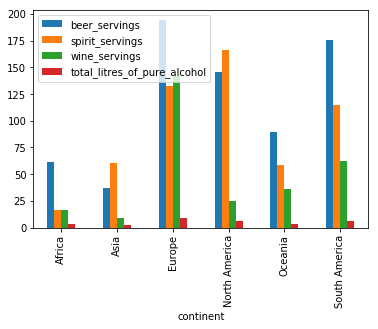

In [23]:
drinks.groupby("continent").mean().plot(kind="bar")